<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/pre_trained_image_classifier_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply a Resnet image classifier that has been pre-trained on ImageNet 

In [1]:
import torch
from torchvision import models

In [2]:
torch.__version__

'1.8.1+cu101'

List of pre-trained models.

In [3]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [19]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [8]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

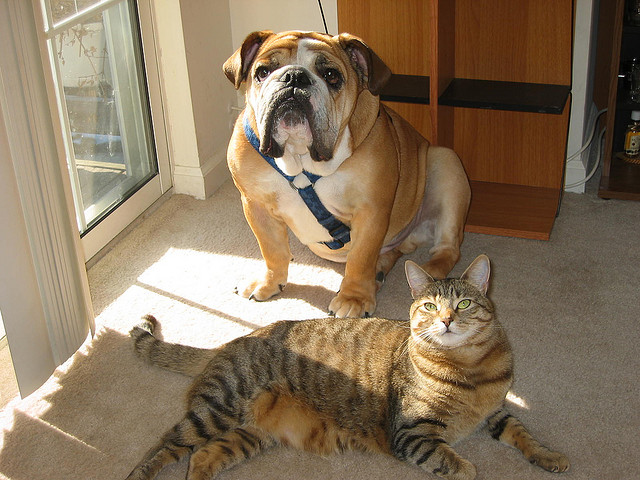

In [10]:
!wget https://github.com/probml/pyprobml/blob/master/images/cat_dog.jpg?raw=true -q -O img.jpg
from PIL import Image
img = Image.open('img.jpg')
display(img)

In [11]:
print(type(img))
img_t = preprocess(img) # convert to tensor
print(type(img_t))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'torch.Tensor'>


In [12]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
print(img_t.shape)
print(batch_t.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [13]:
resnet.eval(); # set to eval mode (not training)

In [14]:
out = resnet(batch_t)
print(out.shape)


torch.Size([1, 1000])


In [16]:
import urllib
import requests
url = "https://raw.githubusercontent.com/probml/pyprobml/master/data/imagenet_classes.txt"
response = requests.get(url)
file = urllib.request.urlopen(url)
labels = [line.strip() for line in file.readlines()]
print(labels)

[b'tench, Tinca tinca', b'goldfish, Carassius auratus', b'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', b'tiger shark, Galeocerdo cuvieri', b'hammerhead, hammerhead shark', b'electric ray, crampfish, numbfish, torpedo', b'stingray', b'cock', b'hen', b'ostrich, Struthio camelus', b'brambling, Fringilla montifringilla', b'goldfinch, Carduelis carduelis', b'house finch, linnet, Carpodacus mexicanus', b'junco, snowbird', b'indigo bunting, indigo finch, indigo bird, Passerina cyanea', b'robin, American robin, Turdus migratorius', b'bulbul', b'jay', b'magpie', b'chickadee', b'water ouzel, dipper', b'kite', b'bald eagle, American eagle, Haliaeetus leucocephalus', b'vulture', b'great grey owl, great gray owl, Strix nebulosa', b'European fire salamander, Salamandra salamandra', b'common newt, Triturus vulgaris', b'eft', b'spotted salamander, Ambystoma maculatum', b'axolotl, mud puppy, Ambystoma mexicanum', b'bullfrog, Rana catesbeiana', b'tree frog, tree-

In [18]:
# Show top 5 labels
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[(b'bull mastiff', 53.93839645385742),
 (b'tiger cat', 15.526689529418945),
 (b'tabby, tabby cat', 7.479008197784424),
 (b'boxer', 7.451477527618408),
 (b'doormat, welcome mat', 2.4113965034484863)]